# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats
from lib.plot_config import PlotDataType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1

## Simulations

In [3]:
nsample = 1000

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample)

θ3 = numpy.array([0.2, 0.1, 0.4])
ma3 = arima.maq(θ3, nsample)

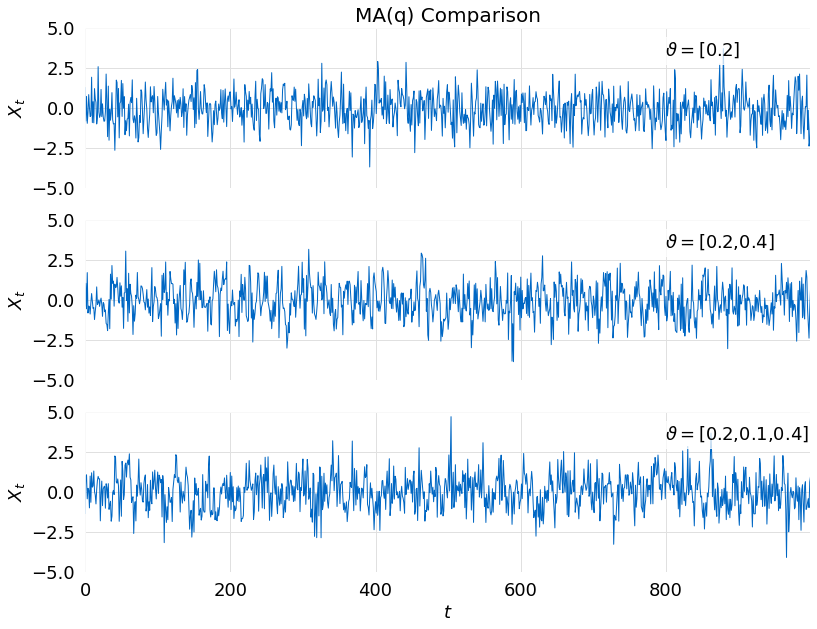

In [4]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = [ma1, ma2, ma3]
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = 0.2$

In [5]:
results = arima.ma_estimate(ma1, 1)
results.polynomial_ma, results.bse

(array([1.        , 0.17318224]), array([0.03724822, 0.03092248, 0.04440273]))

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1421.287
Date:                Sat, 26 Mar 2022   AIC                           2848.574
Time:                        09:57:00   BIC                           2863.297
Sample:                             0   HQIC                          2854.170
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0430      0.037     -1.154      0.249      -0.116       0.030
ma.L1          0.1732      0.031      5.601      0.000       0.113       0.234
sigma2         1.0047      0.044     22.626      0.000       0.918       1.092
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.98   Prob(JB):                         0.82
Heteroskedasticity (H):               1.07   Skew:                             0.04
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.4]$

In [7]:
results = arima.ma_estimate(ma2, 2)
results.polynomial_ma, results.bse

(array([1.        , 0.21283562, 0.39827292]),
 array([0.05075061, 0.0286902 , 0.02927711, 0.0434009 ]))

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1412.555
Date:                Sat, 26 Mar 2022   AIC                           2833.110
Time:                        09:57:00   BIC                           2852.741
Sample:                             0   HQIC                          2840.571
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0754      0.051     -1.485      0.138      -0.175       0.024
ma.L1          0.2128      0.029      7.418      0.000       0.157       0.269
ma.L2          0.3983      0.029     13.604      0.000       0.341       0.456
sigma2         0.9869      0.043     22.740      0.000       0.902       1.072
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.82   Prob(JB):                         0.85
Heteroskedasticity (H):               1.07   Skew:                             0.01
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.1, 0.4]$

In [9]:
results = arima.ma_estimate(ma3, 3)
results.polynomial_ma, results.bse

(array([1.        , 0.21475863, 0.10221026, 0.38375795]),
 array([0.05291782, 0.02943085, 0.02990527, 0.02991559, 0.04268628]))

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1403.061
Date:                Sat, 26 Mar 2022   AIC                           2816.122
Time:                        09:57:00   BIC                           2840.661
Sample:                             0   HQIC                          2825.448
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0111      0.053      0.210      0.833      -0.093       0.115
ma.L1          0.2148      0.029      7.297      0.000       0.157       0.272
ma.L2          0.1022      0.030      3.418      0.001       0.044       0.161
ma.L3          0.3838      0.030     12.828      0.000       0.325       0.442
sigma2         0.9682      0.043     22.682      0.000       0.885       1.052
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.63   Prob(JB):                         0.68
Heteroskedasticity (H):               0.98   Skew:                             0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""